In [1]:
from nn import MLP
import matplotlib.pyplot as plt
import numpy as np
import random
from sklearn.neural_network import MLPRegressor

/home/sina/.local/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
random.seed(7777)
np.random.seed(7777)

In [3]:
def f(x):
    return np.sin(x)

In [4]:
x = np.array(np.linspace(0, 10, 50))
y = np.array([f(e) for e in x])
y += np.random.normal(0, 0.2, size=len(y))
xs = x.reshape(-1, 1)

In [5]:
nn = MLP([(1, 32), (32, 64), (64, 64), (64, 32), (32, 1)], activation='tanh')

alpha = 0.001
beta_1 = 0.9
beta_2 = 0.999
eps = 1e-8

m = np.zeros(len(nn.parameters()))
v = np.zeros(len(nn.parameters()))

nit = 400
y_hat = None
losses = np.ones(nit)
idxs = np.random.choice(np.arange(0, len(xs)), nit)
for i in range(1, nit+1):
    y_hat = nn(xs[idxs[i-1]])
    loss = ((y_hat - y[idxs[i-1]])**2)/len(x)
    losses[i-1] = loss.data
    nn.zero_grad()
    loss.backward()
    
    if i%100 == 0:
        print(f"iter {i}: loss {loss.data}")

    params = nn.parameters()
    p_vals = np.array([p.data for p in params])
    g = np.array([p.grad for p in params])
    m = beta_1 * m + (1 - beta_1) * g
    v = beta_2 * v + (1 - beta_2) * (g**2)
    m_hat = m/(1-beta_1**i)
    v_hat = v/(1-beta_2**i)

    step = alpha * m_hat/(np.sqrt(v_hat) + eps)
    p_vals -= step
    nn.set_params(p_vals)

iter 100: loss 0.0018871318581314403
iter 200: loss 0.0018871318581314403
iter 300: loss 0.030393706802031583
iter 400: loss 0.031068177945538792


In [6]:
def sgd():
    nn = MLP([(1, 32), (32, 64), (64, 64), (64, 32), (32, 1)], activation='tanh')

    nit = 500
    y_hat = None
    losses = np.ones(nit)
    eta = 1e-3
    idxs = np.random.choice(np.arange(0, len(xs)), nit)
    for i in range(nit):
        y_hat = nn(xs[idxs[i]])
        loss = ((y_hat - y[idxs[i]])**2)/len(x)
        losses[i] = loss.data
        nn.zero_grad()
        loss.backward()

        if i%100 == 0:
            print(f"iter {i}: loss {loss.data}")

        for p in nn.parameters():
            p.data -= eta * p.grad

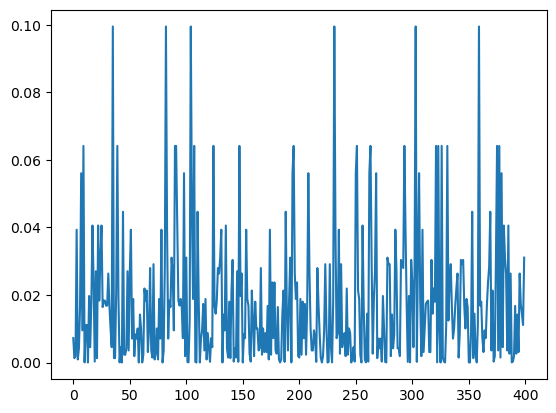

In [7]:
plt.plot(np.arange(nit), losses)

In [8]:
nn_pred = [nn(d).data for d in xs]

In [9]:
rgr = MLPRegressor(hidden_layer_sizes=(32, 64, 32,), max_iter=400, solver='adam', activation='tanh')
rgr.fit(xs, y)
y_pred = rgr.predict(xs)

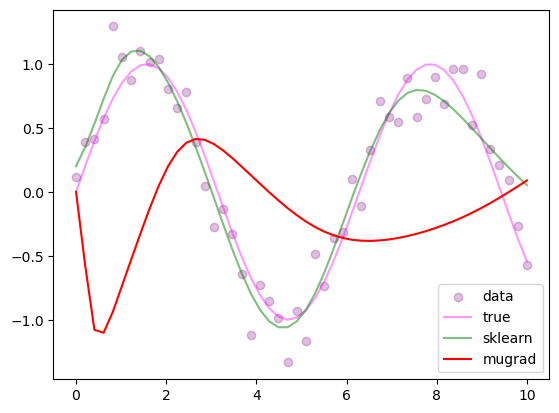

In [10]:
plt.scatter(xs, y, c='purple', alpha=0.25, label='data')
plt.plot(xs, f(xs), c='magenta', alpha=0.4, label='true')
plt.plot(xs, y_pred, c='green', alpha=0.5, label='sklearn')
plt.plot(xs, nn_pred, c='red', label='mugrad')
plt.legend()
plt.show()